In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
%matplotlib inline
from scipy import stats


In [130]:
#reading the raw file
tickets=pd.read_excel('D:\\AI Cadet\\tickets.xls')
tickets.head(10)

,timestamp,work_item,work_type,work_priority,domain,platform,components,from_phase,to_phase,from_resource,to_resource
0,2015-01-02 14:39:14,WI_000001,WT_00001,WP_00003,BD_00001,PL_00001,NaN,NaN,Analyze,NaN,ER_00043
1,2015-01-05 11:48:08,WI_000001,WT_00001,WP_00003,BD_00001,PL_00001,NaN,Analyze,Design,ER_00043,ER_00149
2,2015-01-05 12:35:59,WI_000001,WT_00001,WP_00003,BD_00001,PL_00001,NaN,Design,Analyze,ER_00149,ER_00149
3,2015-01-07 11:04:51,WI_000001,WT_00001,WP_00003,BD_00001,PL_00001,NaN,Analyze,Design,ER_00149,ER_00043
4,2015-01-07 14:04:44,WI_000001,WT_00001,WP_00003,BD_00001,PL_00001,NaN,Design,Analyze,ER_00043,ER_00149
5,2015-01-07 14:07:56,WI_000001,WT_00001,WP_00003,BD_00001,PL_00001,NaN,Analyze,Design,ER_00149,ER_00043
6,2015-01-07 14:37:35,WI_000001,WT_00001,WP_00003,BD_00001,PL_00001,NaN,Design,Build,ER_00043,ER_00149
7,2015-01-13 10:25:36,WI_000001,WT_00001,WP_00003,BD_00001,PL_00001,NaN,Build,Test,ER_00149,ER_00058
8,2015-01-15 11:04:02,WI_000001,WT_00001,WP_00003,BD_00001,PL_00001,NaN,Test,Package,ER_00058,ER_00149
9,2015-01-19 08:54:54,WI_000001,WT_00001,WP_00003,BD_00001,PL_00001,NaN,Package,Accept,ER_00149,ER_00149


In [131]:
tickets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 11 columns):
timestamp        65535 non-null datetime64[ns]
work_item        65535 non-null object
work_type        65535 non-null object
work_priority    65535 non-null object
domain           65535 non-null object
platform         65535 non-null object
components       44795 non-null object
from_phase       55279 non-null object
to_phase         55869 non-null object
from_resource    55279 non-null object
to_resource      55869 non-null object
dtypes: datetime64[ns](1), object(10)
memory usage: 5.5+ MB


In [132]:
#check for number of rows and collumns in main tickets data
tickets.shape

(65535, 11)

In [133]:
#filter the data based on From_phase IS NULL or to_Phase is NULL
tickets_cleaned=tickets[tickets['from_phase'].isnull() | tickets['to_phase'].isnull()]
tickets_cleaned.head(10)

,timestamp,work_item,work_type,work_priority,domain,platform,components,from_phase,to_phase,from_resource,to_resource
0,2015-01-02 14:39:14,WI_000001,WT_00001,WP_00003,BD_00001,PL_00001,NaN,NaN,Analyze,NaN,ER_00043
11,2015-01-27 11:36:51,WI_000001,WT_00001,WP_00003,BD_00001,PL_00001,NaN,Deploy,NaN,ER_00043,NaN
12,2015-01-02 15:04:20,WI_000002,WT_00002,WP_00004,BD_00002,PL_00002,CO_00037/CO_00071,NaN,Analyze,NaN,ER_00225
15,2015-01-14 09:46:37,WI_000002,WT_00002,WP_00004,BD_00002,PL_00002,CO_00037/CO_00071,Build,NaN,ER_00225,NaN
16,2015-01-02 15:28:22,WI_000003,WT_00002,WP_00004,BD_00002,PL_00002,CO_00037/CO_00071,NaN,Analyze,NaN,ER_00225
23,2015-02-26 11:50:37,WI_000003,WT_00002,WP_00004,BD_00002,PL_00002,CO_00037/CO_00071,Package,NaN,ER_00225,NaN
24,2015-01-02 15:33:54,WI_000004,WT_00002,WP_00004,BD_00002,PL_00002,CO_00037/CO_00071,NaN,Analyze,NaN,ER_00225
31,2015-01-28 09:11:05,WI_000004,WT_00002,WP_00004,BD_00002,PL_00002,CO_00037/CO_00071,Deploy,NaN,ER_00061,NaN
32,2015-01-02 16:32:11,WI_000005,WT_00002,WP_00003,BD_00003,PL_00003,CO_00113,NaN,Analyze,NaN,ER_00206
39,2015-02-04 12:57:49,WI_000005,WT_00002,WP_00003,BD_00003,PL_00003,CO_00113,Deploy,NaN,ER_00206,NaN


In [134]:
#check for number of rows and collumns in main tickets_cleaned data
tickets_cleaned.shape

(19922, 11)

In [135]:
#copy the file tickets_cleaned to a data frame
df=tickets_cleaned
df.shape

(19922, 11)

In [136]:
#add a collumn called current status
#df['current_status']=df[df['to_phase'].isna()].from_phase

In [137]:
df.head(10)

,timestamp,work_item,work_type,work_priority,domain,platform,components,from_phase,to_phase,from_resource,to_resource
0,2015-01-02 14:39:14,WI_000001,WT_00001,WP_00003,BD_00001,PL_00001,NaN,NaN,Analyze,NaN,ER_00043
11,2015-01-27 11:36:51,WI_000001,WT_00001,WP_00003,BD_00001,PL_00001,NaN,Deploy,NaN,ER_00043,NaN
12,2015-01-02 15:04:20,WI_000002,WT_00002,WP_00004,BD_00002,PL_00002,CO_00037/CO_00071,NaN,Analyze,NaN,ER_00225
15,2015-01-14 09:46:37,WI_000002,WT_00002,WP_00004,BD_00002,PL_00002,CO_00037/CO_00071,Build,NaN,ER_00225,NaN
16,2015-01-02 15:28:22,WI_000003,WT_00002,WP_00004,BD_00002,PL_00002,CO_00037/CO_00071,NaN,Analyze,NaN,ER_00225
23,2015-02-26 11:50:37,WI_000003,WT_00002,WP_00004,BD_00002,PL_00002,CO_00037/CO_00071,Package,NaN,ER_00225,NaN
24,2015-01-02 15:33:54,WI_000004,WT_00002,WP_00004,BD_00002,PL_00002,CO_00037/CO_00071,NaN,Analyze,NaN,ER_00225
31,2015-01-28 09:11:05,WI_000004,WT_00002,WP_00004,BD_00002,PL_00002,CO_00037/CO_00071,Deploy,NaN,ER_00061,NaN
32,2015-01-02 16:32:11,WI_000005,WT_00002,WP_00003,BD_00003,PL_00003,CO_00113,NaN,Analyze,NaN,ER_00206
39,2015-02-04 12:57:49,WI_000005,WT_00002,WP_00003,BD_00003,PL_00003,CO_00113,Deploy,NaN,ER_00206,NaN


In [138]:
df.shape

(19922, 11)

In [139]:
df.to_phase.unique()

array(['Analyze', nan], dtype=object)

In [140]:
df_analyze=df[df.to_phase=='Analyze']
df_analyze.shape

(10256, 11)

In [141]:
df_final=df[df.to_phase!='Analyze']
df_final.shape

(9666, 11)

In [142]:
df_final.head()

,timestamp,work_item,work_type,work_priority,domain,platform,components,from_phase,to_phase,from_resource,to_resource
11,2015-01-27 11:36:51,WI_000001,WT_00001,WP_00003,BD_00001,PL_00001,NaN,Deploy,NaN,ER_00043,NaN
15,2015-01-14 09:46:37,WI_000002,WT_00002,WP_00004,BD_00002,PL_00002,CO_00037/CO_00071,Build,NaN,ER_00225,NaN
23,2015-02-26 11:50:37,WI_000003,WT_00002,WP_00004,BD_00002,PL_00002,CO_00037/CO_00071,Package,NaN,ER_00225,NaN
31,2015-01-28 09:11:05,WI_000004,WT_00002,WP_00004,BD_00002,PL_00002,CO_00037/CO_00071,Deploy,NaN,ER_00061,NaN
39,2015-02-04 12:57:49,WI_000005,WT_00002,WP_00003,BD_00003,PL_00003,CO_00113,Deploy,NaN,ER_00206,NaN


In [143]:
df_analyze_clean=df_analyze[df_analyze['work_item'].isin(df_final['work_item'])]
df_analyze_clean.shape
df_analyze_clean=df_analyze_clean.rename(columns = {'timestamp':'time_initial_status'})

In [144]:
df_analyze_clean.shape

(9666, 11)

In [145]:
#checck for NA value in from_phase
df_analyze_clean.from_phase.unique()

array([nan], dtype=object)

In [146]:
#drop NA collumn from_phase
df_analyze_clean=df_analyze_clean.drop(['from_phase', 'from_resource'], axis = 1)

In [147]:
df_final=df_final[['timestamp','work_item','from_phase']]

In [148]:
df_final.columns = ['time_current_status', 'work_item', 'from_phase'] 

In [149]:
df_final.shape

(9666, 3)

In [150]:
df_merge_col = pd.merge(df_final, df_analyze_clean, on='work_item')
df_merge_col.head(10)

,time_current_status,work_item,from_phase,time_initial_status,work_type,work_priority,domain,platform,components,to_phase,to_resource
0,2015-01-27 11:36:51,WI_000001,Deploy,2015-01-02 14:39:14,WT_00001,WP_00003,BD_00001,PL_00001,NaN,Analyze,ER_00043
1,2015-01-14 09:46:37,WI_000002,Build,2015-01-02 15:04:20,WT_00002,WP_00004,BD_00002,PL_00002,CO_00037/CO_00071,Analyze,ER_00225
2,2015-02-26 11:50:37,WI_000003,Package,2015-01-02 15:28:22,WT_00002,WP_00004,BD_00002,PL_00002,CO_00037/CO_00071,Analyze,ER_00225
3,2015-01-28 09:11:05,WI_000004,Deploy,2015-01-02 15:33:54,WT_00002,WP_00004,BD_00002,PL_00002,CO_00037/CO_00071,Analyze,ER_00225
4,2015-02-04 12:57:49,WI_000005,Deploy,2015-01-02 16:32:11,WT_00002,WP_00003,BD_00003,PL_00003,CO_00113,Analyze,ER_00206
5,2015-02-04 12:57:26,WI_000006,Deploy,2015-01-02 16:56:27,WT_00002,WP_00003,BD_00003,PL_00003,CO_00113,Analyze,ER_00206
6,2015-01-19 10:23:31,WI_000007,Deploy,2015-01-03 14:33:10,WT_00002,WP_00003,BD_00001,PL_00001,NaN,Analyze,ER_00054
7,2015-01-13 08:58:33,WI_000008,Deploy,2015-01-04 20:57:40,WT_00002,WP_00003,BD_00003,PL_00003,CO_00113,Analyze,ER_00206
8,2015-01-06 14:52:25,WI_000009,Analyze,2015-01-04 21:28:12,WT_00002,WP_00003,BD_00004,PL_00004,NaN,Analyze,ER_00261
9,2015-02-25 08:17:57,WI_000010,Deploy,2015-01-05 08:56:47,WT_00002,WP_00003,BD_00003,PL_00003,CO_00113,Analyze,ER_00206


In [151]:
from datetime import datetime, timedelta
df_merge_col['aging']=(df_merge_col['time_current_status']-df_merge_col['time_initial_status'])/timedelta (days=1)

In [152]:
df_merge_col.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9666 entries, 0 to 9665
Data columns (total 12 columns):
time_current_status    9666 non-null datetime64[ns]
work_item              9666 non-null object
from_phase             9666 non-null object
time_initial_status    9666 non-null datetime64[ns]
work_type              9666 non-null object
work_priority          9666 non-null object
domain                 9666 non-null object
platform               9666 non-null object
components             6521 non-null object
to_phase               9666 non-null object
to_resource            9666 non-null object
aging                  9666 non-null float64
dtypes: datetime64[ns](2), float64(1), object(9)
memory usage: 981.7+ KB


In [153]:
df_merge_col.shape

(9666, 12)

In [154]:
df_merge_col.head(10)

,time_current_status,work_item,from_phase,time_initial_status,work_type,work_priority,domain,platform,components,to_phase,to_resource,aging
0,2015-01-27 11:36:51,WI_000001,Deploy,2015-01-02 14:39:14,WT_00001,WP_00003,BD_00001,PL_00001,NaN,Analyze,ER_00043,24.873345
1,2015-01-14 09:46:37,WI_000002,Build,2015-01-02 15:04:20,WT_00002,WP_00004,BD_00002,PL_00002,CO_00037/CO_00071,Analyze,ER_00225,11.779363
2,2015-02-26 11:50:37,WI_000003,Package,2015-01-02 15:28:22,WT_00002,WP_00004,BD_00002,PL_00002,CO_00037/CO_00071,Analyze,ER_00225,54.848785
3,2015-01-28 09:11:05,WI_000004,Deploy,2015-01-02 15:33:54,WT_00002,WP_00004,BD_00002,PL_00002,CO_00037/CO_00071,Analyze,ER_00225,25.734155
4,2015-02-04 12:57:49,WI_000005,Deploy,2015-01-02 16:32:11,WT_00002,WP_00003,BD_00003,PL_00003,CO_00113,Analyze,ER_00206,32.851134
5,2015-02-04 12:57:26,WI_000006,Deploy,2015-01-02 16:56:27,WT_00002,WP_00003,BD_00003,PL_00003,CO_00113,Analyze,ER_00206,32.834016
6,2015-01-19 10:23:31,WI_000007,Deploy,2015-01-03 14:33:10,WT_00002,WP_00003,BD_00001,PL_00001,NaN,Analyze,ER_00054,15.826632
7,2015-01-13 08:58:33,WI_000008,Deploy,2015-01-04 20:57:40,WT_00002,WP_00003,BD_00003,PL_00003,CO_00113,Analyze,ER_00206,8.500613
8,2015-01-06 14:52:25,WI_000009,Analyze,2015-01-04 21:28:12,WT_00002,WP_00003,BD_00004,PL_00004,NaN,Analyze,ER_00261,1.725150
9,2015-02-25 08:17:57,WI_000010,Deploy,2015-01-05 08:56:47,WT_00002,WP_00003,BD_00003,PL_00003,CO_00113,Analyze,ER_00206,50.973032


In [155]:
# rounding collumns in a data frame for collumn aging
df=df_merge_col.round({"aging":1})

In [156]:
df.head()

,time_current_status,work_item,from_phase,time_initial_status,work_type,work_priority,domain,platform,components,to_phase,to_resource,aging
0,2015-01-27 11:36:51,WI_000001,Deploy,2015-01-02 14:39:14,WT_00001,WP_00003,BD_00001,PL_00001,NaN,Analyze,ER_00043,24.9
1,2015-01-14 09:46:37,WI_000002,Build,2015-01-02 15:04:20,WT_00002,WP_00004,BD_00002,PL_00002,CO_00037/CO_00071,Analyze,ER_00225,11.8
2,2015-02-26 11:50:37,WI_000003,Package,2015-01-02 15:28:22,WT_00002,WP_00004,BD_00002,PL_00002,CO_00037/CO_00071,Analyze,ER_00225,54.8
3,2015-01-28 09:11:05,WI_000004,Deploy,2015-01-02 15:33:54,WT_00002,WP_00004,BD_00002,PL_00002,CO_00037/CO_00071,Analyze,ER_00225,25.7
4,2015-02-04 12:57:49,WI_000005,Deploy,2015-01-02 16:32:11,WT_00002,WP_00003,BD_00003,PL_00003,CO_00113,Analyze,ER_00206,32.9


In [157]:
#check for NA values in the entire data set
df1 = df[df.isna().any(axis=1)]
df1.head()

,time_current_status,work_item,from_phase,time_initial_status,work_type,work_priority,domain,platform,components,to_phase,to_resource,aging
0,2015-01-27 11:36:51,WI_000001,Deploy,2015-01-02 14:39:14,WT_00001,WP_00003,BD_00001,PL_00001,NaN,Analyze,ER_00043,24.9
6,2015-01-19 10:23:31,WI_000007,Deploy,2015-01-03 14:33:10,WT_00002,WP_00003,BD_00001,PL_00001,NaN,Analyze,ER_00054,15.8
8,2015-01-06 14:52:25,WI_000009,Analyze,2015-01-04 21:28:12,WT_00002,WP_00003,BD_00004,PL_00004,NaN,Analyze,ER_00261,1.7
13,2016-05-27 19:23:54,WI_000014,Build,2015-01-05 11:10:43,WT_00001,WP_00002,BD_00004,PL_00004,NaN,Analyze,ER_00273,508.3
29,2016-07-14 13:18:11,WI_000030,Deploy,2015-01-05 15:44:12,WT_00001,WP_00003,BD_00006,PL_00006,NaN,Analyze,ER_00091,555.9


In [158]:
df1.shape
#We havve 3145 lines which are having NA values for components

(3145, 12)

In [159]:
#Descriptive Statistics for Numeric fields

df.describe()

#Total number of tickets are 9666
#Average aging of a ticket is 60 days
#Maximum age of a ticket is 1112 days , 
#from this we understand the max value is way beyind the mean, So we need to eliminate the outliners from the data

,aging
count,9666.000000
mean,60.011059
std,107.283299
min,0.000000
25%,5.000000
50%,20.000000
75%,67.200000
max,1112.900000


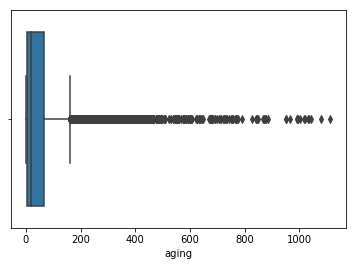

In [160]:
import seaborn as sns
sns.boxplot(x=df['aging'])

In [161]:
#According to empirical rule, almost 99.97% data fall under three standard deviations
#Finding the outliner using Z value
#Z score tells us , how many standard deviations a number is from the mean

from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df['aging']))
print(z)

[0.32729116 0.44940409 0.0485754  ... 0.52304471 0.55194166 0.52397687]


In [162]:
threshold = 3
print(np.where(z > 3))

(array([  13,   29,  110,  112,  113,  178,  184,  190,  194,  201,  223,
        246,  268,  272,  280,  284,  290,  295,  321,  326,  328,  406,
        427,  428,  449,  507,  534,  589,  601,  606,  634,  641,  751,
        777,  779,  868,  878,  889,  899,  912,  928,  929, 1014, 1032,
       1046, 1057, 1085, 1107, 1109, 1110, 1127, 1170, 1186, 1196, 1198,
       1220, 1227, 1243, 1260, 1269, 1295, 1368, 1369, 1372, 1390, 1410,
       1413, 1416, 1453, 1477, 1478, 1480, 1523, 1595, 1630, 1637, 1645,
       1668, 1693, 1700, 1711, 1724, 1742, 1758, 1804, 1950, 1976, 1977,
       2015, 2045, 2055, 2125, 2153, 2156, 2170, 2171, 2184, 2205, 2219,
       2222, 2231, 2233, 2239, 2248, 2250, 2252, 2264, 2280, 2310, 2333,
       2387, 2421, 2426, 2437, 2522, 2528, 2529, 2535, 2536, 2590, 2596,
       2625, 2654, 2688, 2732, 2744, 2752, 2825, 2828, 2856, 2887, 2938,
       2955, 2962, 2967, 2977, 2995, 3070, 3080, 3087, 3164, 3188, 3237,
       3241, 3261, 3275, 3361, 3371, 3380, 3381, 3

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021FE838BDA0>]],
      dtype=object)

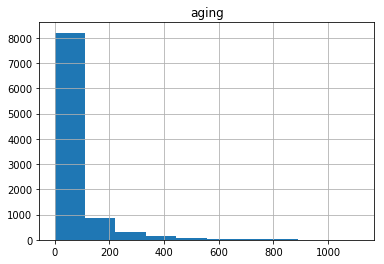

In [163]:

#Plotting Histogram for Aging to know the outliners on the data
df.hist(column='aging')

In [164]:
#Remove the outliners 

df = df[(z <3)]
df.shape

(9440, 12)

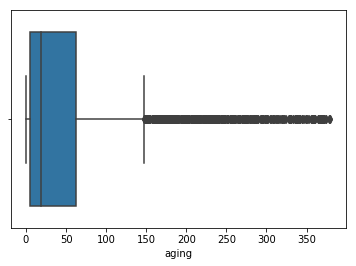

In [165]:
sns.boxplot(x=df['aging'])

In [166]:
df.shape

(9440, 12)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021FE838B390>]],
      dtype=object)

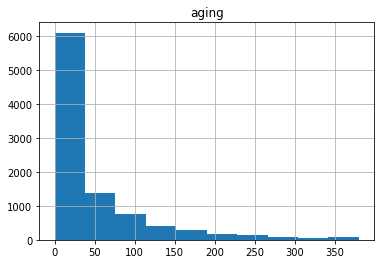

In [167]:

#Plotting Histogram for Aging after removing the outliners
df.hist(column='aging')

In [168]:
df.describe()

,aging
count,9440.000000
mean,47.799078
std,68.435533
min,0.000000
25%,5.000000
50%,18.900000
75%,62.000000
max,379.600000


In [169]:
data_mean, data_std = np.mean(df), np.std(df)
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
print(lower,upper)


aging   -157.496646
dtype: float64 aging    253.094803
dtype: float64


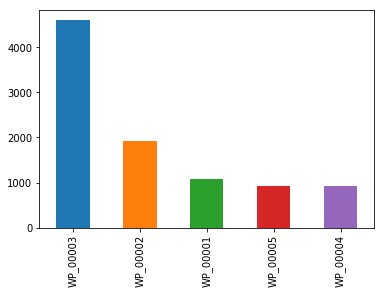

In [170]:
# Univariant Analysis

#Univariant analysis on work priorty, we can see WP 3 and WP 2 is having more count.

df['work_priority'].value_counts().plot.bar()


In [171]:
df.from_phase.unique()


array(['Deploy', 'Build', 'Package', 'Analyze', 'Design'], dtype=object)

In [172]:
df.dtypes
# from here we can see the data types are categorical as object which is in varchar and we already derived aging , 
# we can drop time current status and time initial status

time_current_status    datetime64[ns]
work_item                      object
from_phase                     object
time_initial_status    datetime64[ns]
work_type                      object
work_priority                  object
domain                         object
platform                       object
components                     object
to_phase                       object
to_resource                    object
aging                         float64
dtype: object

In [173]:
#drop the collumns time_current_status and time_initial_status    
df.drop(['time_current_status', 'time_initial_status'], inplace=True, axis=1, errors='ignore')
df.describe(include='all')

,work_item,from_phase,work_type,work_priority,domain,platform,components,to_phase,to_resource,aging
count,9440,9440,9440,9440,9440,9440,6392,9440,9440,9440.000000
unique,9440,5,3,5,11,19,246,1,224,NaN
top,WI_008229,Deploy,WT_00003,WP_00003,BD_00002,PL_00002,CO_00113,Analyze,ER_00061,NaN
freq,1,6306,3492,4597,2097,2097,599,9440,966,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.799078
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.435533
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.900000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.000000


In [174]:
#check for NA values collumns in the data frame
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()
# as per above code, components is having 3145 NULL entries, we are going to drop components from the data set

components    3048
dtype: int64

In [175]:
#drop components from the data set
df.drop(['components'], inplace = True, axis=1,errors='ignore' )

In [176]:
df.dtypes

work_item         object
from_phase        object
work_type         object
work_priority     object
domain            object
platform          object
to_phase          object
to_resource       object
aging            float64
dtype: object

In [177]:
# convert all objects data types except work_item into numeric
#check for work_priority

df.work_priority.unique()

array(['WP_00003', 'WP_00004', 'WP_00002', 'WP_00001', 'WP_00005'],
      dtype=object)

In [178]:
#we have 5 unique values in the model , now we need to define the precendence and encode into numeric

df['work_priority']=df.work_priority.astype('category', categories = ['WP_00001','WP_00002','WP_00003','WP_00004','WP_00005'], ordered = True)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [179]:
df.work_priority.unique()

[WP_00003, WP_00004, WP_00002, WP_00001, WP_00005]
Categories (5, object): [WP_00001 < WP_00002 < WP_00003 < WP_00004 < WP_00005]

In [180]:
from sklearn.preprocessing import LabelEncoder

In [181]:
encode = LabelEncoder()
df['work_priority']=encode.fit_transform(df['work_priority'])
df.head()

,work_item,from_phase,work_type,work_priority,domain,platform,to_phase,to_resource,aging
0,WI_000001,Deploy,WT_00001,2,BD_00001,PL_00001,Analyze,ER_00043,24.9
1,WI_000002,Build,WT_00002,3,BD_00002,PL_00002,Analyze,ER_00225,11.8
2,WI_000003,Package,WT_00002,3,BD_00002,PL_00002,Analyze,ER_00225,54.8
3,WI_000004,Deploy,WT_00002,3,BD_00002,PL_00002,Analyze,ER_00225,25.7
4,WI_000005,Deploy,WT_00002,2,BD_00003,PL_00003,Analyze,ER_00206,32.9


In [182]:
df.work_priority.unique()

array([2, 3, 1, 0, 4], dtype=int64)

In [183]:
#Now apply Label encoder for work_type, domain, platform, to_resource

column_label = ['work_type','domain','platform','to_resource']

for i in column_label: 

    df[i]=encode.fit_transform(df[i])
df.head()

,work_item,from_phase,work_type,work_priority,domain,platform,to_phase,to_resource,aging
0,WI_000001,Deploy,0,2,0,0,Analyze,35,24.9
1,WI_000002,Build,1,3,1,1,Analyze,171,11.8
2,WI_000003,Package,1,3,1,1,Analyze,171,54.8
3,WI_000004,Deploy,1,3,1,1,Analyze,171,25.7
4,WI_000005,Deploy,1,2,2,2,Analyze,155,32.9


In [184]:
#Now , apply one hot encoder to from_phase , we we dont know how many phases are there in the ticket life cycle
#and we dont exactly know the order

from_phase_onehot= pd.get_dummies(df['from_phase'])
from_phase_onehot.head()

,Analyze,Build,Deploy,Design,Package
0,0,0,1,0,0
1,0,1,0,0,0
2,0,0,0,0,1
3,0,0,1,0,0
4,0,0,1,0,0


In [185]:
merge_df = df.merge(from_phase_onehot, left_index=True, right_index=True, how='inner')

In [186]:
df=merge_df
df.head()

,work_item,from_phase,work_type,work_priority,domain,platform,to_phase,to_resource,aging,Analyze,Build,Deploy,Design,Package
0,WI_000001,Deploy,0,2,0,0,Analyze,35,24.9,0,0,1,0,0
1,WI_000002,Build,1,3,1,1,Analyze,171,11.8,0,1,0,0,0
2,WI_000003,Package,1,3,1,1,Analyze,171,54.8,0,0,0,0,1
3,WI_000004,Deploy,1,3,1,1,Analyze,171,25.7,0,0,1,0,0
4,WI_000005,Deploy,1,2,2,2,Analyze,155,32.9,0,0,1,0,0


In [187]:
#drop collumn from_phase from the main data frame

df.drop(['from_phase'], inplace=True, axis=1, errors='ignore')

In [188]:
df.head()

,work_item,work_type,work_priority,domain,platform,to_phase,to_resource,aging,Analyze,Build,Deploy,Design,Package
0,WI_000001,0,2,0,0,Analyze,35,24.9,0,0,1,0,0
1,WI_000002,1,3,1,1,Analyze,171,11.8,0,1,0,0,0
2,WI_000003,1,3,1,1,Analyze,171,54.8,0,0,0,0,1
3,WI_000004,1,3,1,1,Analyze,171,25.7,0,0,1,0,0
4,WI_000005,1,2,2,2,Analyze,155,32.9,0,0,1,0,0


In [189]:
df.shape

(9440, 13)

In [190]:
#Now we have to_Phase as Analyze is always analyze , we will drop this from the data frame as to_Phase 
#is always Analyze as starting phase
df.drop(['to_phase'], inplace=True, axis=1, errors='ignore')

In [191]:
#Final data set
df.head()

,work_item,work_type,work_priority,domain,platform,to_resource,aging,Analyze,Build,Deploy,Design,Package
0,WI_000001,0,2,0,0,35,24.9,0,0,1,0,0
1,WI_000002,1,3,1,1,171,11.8,0,1,0,0,0
2,WI_000003,1,3,1,1,171,54.8,0,0,0,0,1
3,WI_000004,1,3,1,1,171,25.7,0,0,1,0,0
4,WI_000005,1,2,2,2,155,32.9,0,0,1,0,0


In [192]:
#Split the data set into TRAIN, TEST and VALIDATE data
from sklearn.model_selection import train_test_split
X=df[df.columns.difference(['aging'])]
y = df['aging']

In [193]:
X.head()

,Analyze,Build,Deploy,Design,Package,domain,platform,to_resource,work_item,work_priority,work_type
0,0,0,1,0,0,0,0,35,WI_000001,2,0
1,0,1,0,0,0,1,1,171,WI_000002,3,1
2,0,0,0,0,1,1,1,171,WI_000003,3,1
3,0,0,1,0,0,1,1,171,WI_000004,3,1
4,0,0,1,0,0,2,2,155,WI_000005,2,1


In [194]:
y.head()

0    24.9
1    11.8
2    54.8
3    25.7
4    32.9
Name: aging, dtype: float64

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 88)

In [196]:
#Shape of Training data
print(X_train.shape, y_train.shape)

(7552, 11) (7552,)


In [197]:
#Shape of Testing data
print(X_test.shape, y_test.shape)

(1888, 11) (1888,)


In [198]:
train = pd.concat([X_train, y_train],axis=1)
test = pd.concat([X_test, y_test],axis=1)

In [199]:
train.head()

,Analyze,Build,Deploy,Design,Package,domain,platform,to_resource,work_item,work_priority,work_type,aging
609,0,0,1,0,0,2,7,129,WI_000623,2,1,35.3
8246,0,0,0,1,0,6,11,176,WI_008662,2,1,0.0
1884,0,0,1,0,0,6,11,81,WI_001949,1,0,17.9
7119,0,0,1,0,0,8,18,54,WI_007446,2,0,13.0
1822,0,0,1,0,0,3,10,185,WI_001883,2,2,42.3


In [200]:
test.head()

,Analyze,Build,Deploy,Design,Package,domain,platform,to_resource,work_item,work_priority,work_type,aging
4746,0,0,1,0,0,1,1,49,WI_004911,1,0,11.8
7392,0,0,1,0,0,8,18,54,WI_007746,3,0,16.0
9413,0,0,1,0,0,1,1,166,WI_009968,1,2,6.8
5324,0,0,1,0,0,10,16,43,WI_005523,1,1,10.3
6037,0,0,1,0,0,9,15,32,WI_006268,3,1,3.3


In [201]:
#checking for Co relation

train.corr()

,Analyze,Build,Deploy,Design,Package,domain,platform,to_resource,work_priority,work_type,aging
Analyze,1.000000,-0.105764,-0.607917,-0.119761,-0.088141,0.014276,0.005455,0.032791,0.065673,-0.033905,-0.028709
Build,-0.105764,1.000000,-0.359038,-0.070731,-0.052056,0.064768,0.062191,-0.002754,-0.001480,-0.011672,0.010816
Deploy,-0.607917,-0.359038,1.000000,-0.406552,-0.299211,-0.087501,-0.079253,-0.028631,-0.069749,0.013810,-0.010477
Design,-0.119761,-0.070731,-0.406552,1.000000,-0.058945,0.090513,0.098340,-0.010131,-0.007232,0.023159,0.055308
Package,-0.088141,-0.052056,-0.299211,-0.058945,1.000000,-0.015263,-0.026013,0.024839,0.056997,0.011878,-0.009115
domain,0.014276,0.064768,-0.087501,0.090513,-0.015263,1.000000,0.904567,-0.037090,-0.031019,-0.043512,0.106477
platform,0.005455,0.062191,-0.079253,0.098340,-0.026013,0.904567,1.000000,-0.066778,-0.066178,-0.053297,0.089278
to_resource,0.032791,-0.002754,-0.028631,-0.010131,0.024839,-0.037090,-0.066778,1.000000,0.114832,0.000115,-0.037173
work_priority,0.065673,-0.001480,-0.069749,-0.007232,0.056997,-0.031019,-0.066178,0.114832,1.000000,-0.157073,0.163753
work_type,-0.033905,-0.011672,0.013810,0.023159,0.011878,-0.043512,-0.053297,0.000115,-0.157073,1.000000,-0.192625


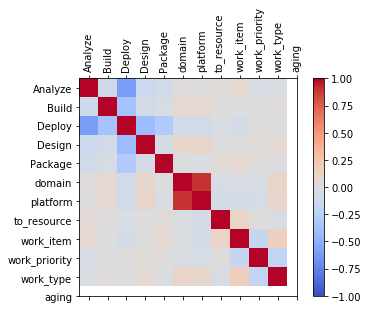

In [202]:
#co realtion between variables of a data set 

corr = train.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(train.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(train.columns)
ax.set_yticklabels(train.columns)
plt.show()

In [203]:
#Linear Regression Two Variable
model1 = sm.ols('aging ~ Analyze + Build + Deploy + Design + Package + domain + platform + work_priority + to_resource + work_type ', data=train).fit()

In [204]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  aging   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     65.99
Date:                Sun, 07 Jul 2019   Prob (F-statistic):          2.15e-117
Time:                        22:08:01   Log-Likelihood:                -42317.
No. Observations:                7552   AIC:                         8.465e+04
Df Residuals:                    7542   BIC:                         8.472e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        33.4208      2.257     14.809      0.000      28.997      37.845
Analyze          -0.8604      1.918     -0.449      0.654      -4.621       2.900
Build             7.0029      2.767      2.531      0.011       1.578      12.428
Deploy            6.7050      1.282      5.232      0.000       4.193       9.217
Design           18.6666      2.527      7.386      0.000      13.713      23.621
Package           1.9068      3.231      0.590      0.555      -4.426       8.240
domain            3.2444      0.647      5.012      0.000       1.975       4.513
platform         -0.4832      0.349     -1.383      0.167      -1.168       0.202
work_priority     9.5078      0.729     13.034      0.000       8.078      10.938
to_resource      -0.0521      0.012     -4.433      0.000      -0.075      -0.029
work_type       -13.3553      0.897    -14.896      0.000     -15.113     -11.598
==============================================================================
Omnibus:                     3336.103   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15234.567
Skew:                           2.171   Prob(JB):                         0.00
Kurtosis:                       8.436   Cond. No.                     2.47e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.95e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [205]:
SSE = sum(model1.resid ** 2)
SSE

32553752.996894352

In [206]:
SST = sum((train['aging'] - np.mean(train['aging'])) ** 2)
SST

35117419.7566045

In [207]:
#compure R Square

1 - SSE / SST

0.07300270855543145

In [208]:
#Linear Regression Two Variable
model2 = sm.ols('aging ~ Analyze + Build + Deploy + Design + Package + domain + platform + work_priority + to_resource', data=train).fit()

In [209]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  aging   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     45.18
Date:                Sun, 07 Jul 2019   Prob (F-statistic):           1.86e-71
Time:                        22:08:02   Log-Likelihood:                -42426.
No. Observations:                7552   AIC:                         8.487e+04
Df Residuals:                    7543   BIC:                         8.493e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        19.0009      2.068      9.187      0.000      14.946      23.055
Analyze          -2.8740      1.941     -1.480      0.139      -6.679       0.931
Build             4.7272      2.803      1.686      0.092      -0.768      10.222
Deploy            4.0629      1.288      3.155      0.002       1.539       6.587
Design           14.8638      2.551      5.827      0.000       9.863      19.864
Package          -1.7791      3.268     -0.544      0.586      -8.186       4.627
domain            3.0348      0.657      4.622      0.000       1.748       4.322
platform         -0.2365      0.354     -0.668      0.504      -0.930       0.457
work_priority    11.2690      0.730     15.431      0.000       9.837      12.701
to_resource      -0.0545      0.012     -4.575      0.000      -0.078      -0.031
==============================================================================
Omnibus:                     3384.993   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15446.637
Skew:                           2.211   Prob(JB):                         0.00
Kurtosis:                       8.434   Cond. No.                     2.55e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.83e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [210]:
SSE = sum(model2.resid ** 2)
SSE

33511477.218107995

In [211]:
SST = sum((train['aging'] - np.mean(train['aging'])) ** 2)
SST

35117419.7566045

In [212]:
#compure R Square

1 - SSE / SST

0.045730653038495994

In [213]:
#Linear Regression Two Variable
model3 = sm.ols('aging ~  Build + Deploy + Design + Package + domain + platform + work_priority', data=train).fit()

In [214]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  aging   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     48.52
Date:                Sun, 07 Jul 2019   Prob (F-statistic):           7.44e-68
Time:                        22:32:40   Log-Likelihood:                -42436.
No. Observations:                7552   AIC:                         8.489e+04
Df Residuals:                    7544   BIC:                         8.494e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        10.6300      2.701      3.936      0.000       5.336      15.924
Build             7.8096      3.737      2.090      0.037       0.485      15.135
Deploy            7.2081      2.189      3.293      0.001       2.918      11.499
Design           17.9948      3.453      5.212      0.000      11.227      24.763
Package           1.0269      4.253      0.241      0.809      -7.310       9.364
domain            2.8941      0.657      4.407      0.000       1.607       4.182
platform         -0.1267      0.354     -0.358      0.720      -0.820       0.567
work_priority    10.9200      0.727     15.016      0.000       9.494      12.346
==============================================================================
Omnibus:                     3391.021   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15504.790
Skew:                           2.215   Prob(JB):                         0.00
Kurtosis:                       8.445   Cond. No.                         62.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [215]:
SSE = sum(model3.resid ** 2)
SSE

33604478.98406142

In [216]:
#compure R Square

1 - SSE / SST

0.043082344404262285